In [1]:
# cardeetails1.csv

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv("cardeetails1.csv")

In [3]:
df.head()

,Car Name,Monthly Payment,Upfront,Contract Length,Milage,Document Fee,Average Monthly Cost,Initial Payment
0,1,412.36,9,48,10000,239.99,486.09,3711.21
1,1,391.39,12,48,10000,239.99,486.08,4696.68
2,1,512.35,1,48,15000,239.99,517.35,512.35
3,1,491.86,3,48,15000,239.99,517.35,1475.58
4,1,464.02,6,48,15000,239.99,517.36,2784.11


In [4]:
df.shape

(1109, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car Name              1109 non-null   int64  
 1   Monthly Payment       1109 non-null   float64
 2   Upfront               1109 non-null   int64  
 3   Contract Length       1109 non-null   int64  
 4   Milage                1109 non-null   int64  
 5   Document Fee          1109 non-null   float64
 6   Average Monthly Cost  1109 non-null   float64
 7   Initial Payment       1109 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 69.4 KB


In [6]:
df.describe()

,Car Name,Monthly Payment,Upfront,Contract Length,Milage,Document Fee,Average Monthly Cost,Initial Payment
count,1109.0,1109.000000,1109.000000,1109.000000,1109.000000,1.109000e+03,1109.000000,1109.000000
mean,1.0,529.422831,6.197475,36.638413,12795.311091,2.399900e+02,612.022011,3065.638215
std,0.0,106.072771,3.972577,9.911340,6824.550581,2.843453e-14,114.801126,1840.999319
min,1.0,311.190000,1.000000,24.000000,5000.000000,2.399900e+02,387.500000,382.500000
25%,1.0,452.350000,3.000000,24.000000,8000.000000,2.399900e+02,530.960000,1504.080000
50%,1.0,516.360000,6.000000,36.000000,10000.000000,2.399900e+02,599.920000,3111.420000
75%,1.0,591.980000,9.000000,48.000000,20000.000000,2.399900e+02,690.360000,4561.650000
max,1.0,915.830000,12.000000,48.000000,30000.000000,2.399900e+02,921.240000,7535.960000


In [7]:
df.corr()

,Car Name,Monthly Payment,Upfront,Contract Length,Milage,Document Fee,Average Monthly Cost,Initial Payment
Car Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly Payment,NaN,1.000000e+00,-5.117455e-01,-4.337484e-01,2.403975e-01,-1.841297e-15,8.234785e-01,-2.867809e-01
Upfront,NaN,-5.117455e-01,1.000000e+00,-7.292100e-04,1.692027e-03,-7.724709e-18,-5.283097e-04,9.507464e-01
Contract Length,NaN,-4.337484e-01,-7.292100e-04,1.000000e+00,2.009580e-01,1.261600e-15,-6.513802e-01,-1.164688e-01
Milage,NaN,2.403975e-01,1.692027e-03,2.009580e-01,1.000000e+00,2.081708e-16,2.199614e-01,8.830212e-02
Document Fee,NaN,-1.841297e-15,-7.724709e-18,1.261600e-15,2.081708e-16,1.000000e+00,5.920118e-16,4.592831e-16
Average Monthly Cost,NaN,8.234785e-01,-5.283097e-04,-6.513802e-01,2.199614e-01,5.920118e-16,1.000000e+00,2.545991e-01
Initial Payment,NaN,-2.867809e-01,9.507464e-01,-1.164688e-01,8.830212e-02,4.592831e-16,2.545991e-01,1.000000e+00


In [8]:

df1 = df.drop(['Average Monthly Cost'], axis=1)

In [9]:
df1.head()

,Car Name,Monthly Payment,Upfront,Contract Length,Milage,Document Fee,Initial Payment
0,1,412.36,9,48,10000,239.99,3711.21
1,1,391.39,12,48,10000,239.99,4696.68
2,1,512.35,1,48,15000,239.99,512.35
3,1,491.86,3,48,15000,239.99,1475.58
4,1,464.02,6,48,15000,239.99,2784.11


In [10]:
df.Upfront.unique()

array([ 9, 12,  1,  3,  6], dtype=int64)

In [11]:
df['Contract Length'].unique()

array([48, 24, 36], dtype=int64)

In [12]:
df['Milage'].unique()

array([10000, 15000, 20000, 30000,  5000,  8000], dtype=int64)

In [13]:
df['Document Fee'].unique()



array([239.99])

.

# HERE WE CAN SEE THAT INITIAL PAYMENT ARE MANY SO LETS GROUP IT

In [14]:
print('Initial Payment')
df['Initial Payment'].unique()

Initial Payment


array([3711.21, 4696.68,  512.35, ..., 2078.49, 2950.71, 3734.24])

In [15]:
df['Initial Payment'].max()

7535.96

In [16]:
df['Initial Payment'].min()

382.5

In [17]:
df['Initial Payment'].describe()

count    1109.000000
mean     3065.638215
std      1840.999319
min       382.500000
25%      1504.080000
50%      3111.420000
75%      4561.650000
max      7535.960000
Name: Initial Payment, dtype: float64

In [18]:
df1 = df

In [19]:

bins = [0,2000,5000,8000]
group = ['0_2000','2000-5000','5000-8000']
df1['Initial Payment group'] = pd.cut(df['Initial Payment'],bins,labels=group)


Monthly Payment        311.19  316.97  324.25  324.81  327.26  327.86  331.83  \
Initial Payment group                                                           
0_2000                      0       0       0       0       0       0       0   
2000-5000                   1       1       1       1       1       1       1   
5000-8000                   0       0       0       0       0       0       0   

Monthly Payment        333.96  335.69  336.47  ...  843.74  845.38  845.78  \
Initial Payment group                          ...                           
0_2000                      0       0       0  ...       1       0       1   
2000-5000                   1       1       1  ...       0       1       0   
5000-8000                   0       0       0  ...       0       0       0   

Monthly Payment        852.33  854.28  857.04  858.53  909.01  912.78  915.83  
Initial Payment group                                                          
0_2000                      1       1      

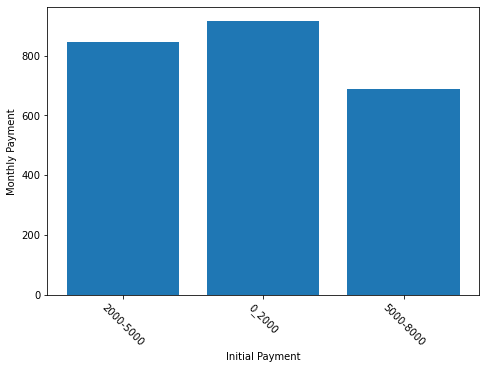

In [20]:
print(pd.crosstab(df1['Initial Payment group'],df1['Monthly Payment']))
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df1['Initial Payment group'],df1['Monthly Payment'])
plt.xticks(rotation=-45)
plt.xlabel('Initial Payment')
plt.ylabel('Monthly Payment')
plt.show()


## HERE WE CAN SHOW THAT PEOPLE WHO PAID LESS AMOUNT IN INITIAL STAGE HAVE TO PAY MORE MOUNTHLY WISE.

.





## Seeing Contract Length relation with Monthly Payment

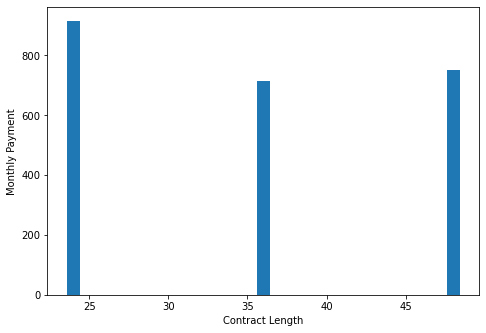

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df1['Contract Length'],df1['Monthly Payment'])

plt.xlabel('Contract Length')
plt.ylabel('Monthly Payment')
plt.show()

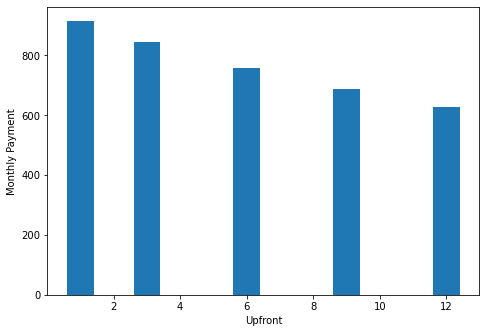

In [22]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df1['Upfront'],df1['Monthly Payment'])

plt.xlabel('Upfront')
plt.ylabel('Monthly Payment')
plt.show()

In [23]:
df1['Milage'].value_counts()

20000    210
15000    210
5000     208
10000    206
8000     205
30000     70
Name: Milage, dtype: int64

#   ------------------------------------------------- ML---------------------------------------------------

In [24]:
df1.isnull().sum()

Car Name                 0
Monthly Payment          0
Upfront                  0
Contract Length          0
Milage                   0
Document Fee             0
Average Monthly Cost     0
Initial Payment          0
Initial Payment group    0
dtype: int64

In [25]:
df1['Car Name'].unique()

array([1], dtype=int64)

In [26]:
y = df1['Monthly Payment']

In [27]:
df2 = df
drops = ['Initial Payment group','Average Monthly Cost','Monthly Payment']
df2 = df2.drop(drops,axis=1)
df2.dtypes

Car Name             int64
Upfront              int64
Contract Length      int64
Milage               int64
Document Fee       float64
Initial Payment    float64
dtype: object

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df2, y,
                                                      train_size=0.7, test_size=0.3,
                                                      random_state=0)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [29]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

In [30]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
label_X_train.head()

,Car Name,Upfront,Contract Length,Milage,Document Fee,Initial Payment
143,1,3,36,20000,239.99,2024.70
158,1,3,48,10000,239.99,1635.06
40,1,9,24,20000,239.99,5416.88
630,1,9,48,5000,239.99,3487.18
432,1,1,24,15000,239.99,814.04


In [31]:
label_X_train['Car Name'].unique()

array([1], dtype=int64)

In [32]:
df['Car Name'].unique()

array([1], dtype=int64)

In [33]:
#df["Customer Number"] = df['Customer Number'].astype('int')

label_X_train = label_X_train.astype(int)
label_X_valid = label_X_valid.astype(int)
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)

In [34]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(label_X_train,y_train)


x = clf.predict(label_X_valid)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df2, y,
                                                      train_size=0.90, test_size=0.10,
                                                      random_state=0)




s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

from sklearn.preprocessing import LabelEncoder


label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])
label_X_train.head()



label_X_train = label_X_train.astype(int)
label_X_valid = label_X_valid.astype(int)
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=450)

clf.fit(label_X_train,y_train)


x = clf.predict(label_X_valid)

label_X_valid


,Car Name,Upfront,Contract Length,Milage,Document Fee,Initial Payment
898,1,12,36,5000,239,5403
983,1,9,48,8000,239,4092
1085,1,9,48,15000,239,3312
493,1,3,48,30000,239,2152
847,1,6,24,10000,239,3069
...,...,...,...,...,...,...
442,1,1,36,5000,239,591
685,1,9,36,5000,239,4092
420,1,9,24,5000,239,4914
831,1,3,24,20000,239,1768


## R-Squared model

In [36]:
from sklearn.metrics import r2_score
r2_score(x, y_valid)

0.9963637724426034

# MAE

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(x, y_valid)

5.684684684684685

In [38]:
import joblib
# Save the model as a pickle in a file 
joblib.dump(clf, 'car_new1.pkl') 

['car_new1.pkl']